In [1]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Importing data files
malwareFile = pd.read_csv('./FinalDataset/Malware.csv')

In [4]:
# Check for null values by column wise
malwareFile.isna().sum()

Querylength                           0
domain_token_count                    0
path_token_count                      0
avgdomaintokenlen                     0
longdomaintokenlen                    0
avgpathtokenlen                      11
tld                                   0
charcompvowels                        0
charcompace                           0
ldl_url                               0
ldl_domain                            0
ldl_path                              0
ldl_filename                          0
ldl_getArg                            0
dld_url                               0
dld_domain                            0
dld_path                              0
dld_filename                          0
dld_getArg                            0
urlLen                                0
domainlength                          0
pathLength                            0
subDirLen                             0
fileNameLen                           0
this.fileExtLen                       0


In [4]:
len(malwareFile)

14493

In [5]:
# Data cleaning with replacing null values with mean-by-column
malwareFile['Entropy_DirectoryName'] = malwareFile['Entropy_DirectoryName'].fillna(malwareFile['Entropy_DirectoryName'].mean())
malwareFile['Entropy_Filename'] = malwareFile['Entropy_Filename'].fillna(malwareFile['Entropy_Filename'].mean())
malwareFile['Entropy_Extension'] = malwareFile['Entropy_Extension'].fillna(malwareFile['Entropy_Extension'].mean())
malwareFile['NumberRate_Extension'] = malwareFile['NumberRate_Extension'].fillna(malwareFile['NumberRate_Extension'].mean())
malwareFile['avgpathtokenlen'] = malwareFile['avgpathtokenlen'].fillna(malwareFile['avgpathtokenlen'].mean())
malwareFile['NumberRate_DirectoryName'] = malwareFile['NumberRate_DirectoryName'].fillna(malwareFile['NumberRate_DirectoryName'].mean())
malwareFile['NumberRate_FileName'] = malwareFile['NumberRate_FileName'].fillna(malwareFile['NumberRate_FileName'].mean())
malwareFile['NumberRate_AfterPath'] = malwareFile['NumberRate_AfterPath'].fillna(malwareFile['NumberRate_AfterPath'].mean())

In [6]:
# Divison of data by columns
# x1 is for independent columns, whilee y1 is target column which is type of attack.
x1 = malwareFile.iloc[:,0:79]
y1 = malwareFile.iloc[:,-1]

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


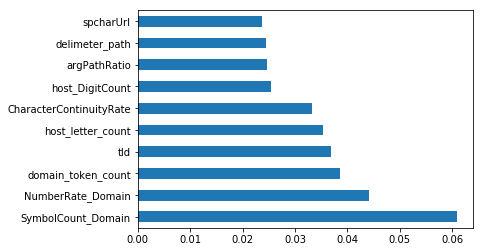

In [8]:
# Feature selection 
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
model=ExtraTreesClassifier()
model.fit(x1,y1)
feature_imp= pd.Series(model.feature_importances_,index=x1.columns)
# Extract best 10 features from all 79 features
feature_imp = feature_imp.nlargest(10)
feature_imp.nlargest(10).plot(kind='barh')
plt.show()

In [9]:
# As everytime features are changing on every run 
# Stroring feeatures in ts variable.
ts = (feature_imp.nlargest(10).to_dict())
ts = ts.keys()
ts

dict_keys(['SymbolCount_Domain', 'NumberRate_Domain', 'domain_token_count', 'tld', 'host_letter_count', 'CharacterContinuityRate', 'host_DigitCount', 'argPathRatio', 'delimeter_path', 'spcharUrl'])

In [10]:
# Final columns for training and testing for model
columns_to_keep = x1[ts]
from sklearn.model_selection import train_test_split
# TODO: What is random state and how it's value is chosen?
features_train,features_test,y_train,y_test = train_test_split(columns_to_keep,y1,test_size=0.3,random_state=66)
from sklearn.ensemble import RandomForestClassifier
# Intiate the model
rfc = RandomForestClassifier()
rfc.fit(features_train,y_train)
score = rfc.score(features_test, y_test)
score

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.984130634774609